In [144]:
import pandas as pd
import glob
import re
def get_file_list(path):
    txtfiles = []
    for file in glob.glob(f"{path}/*.txt"):
        txtfiles.append(file)
    return txtfiles

def get_year_from_filepath(filepath):
    x = re.search("(\d+).txt", filepath)
    if len(x.groups()) > 0:
        return x.groups()[0]
    return None


def year_to_filepath(year):
    return f"Names/yob{year}.txt"

In [145]:
txtfiles = get_file_list("./Names")
print(txtfiles)
df = pd.read_csv(txtfiles[0], sep=",", names=["name", "sex", "number"])

['./Names/yob2000.txt', './Names/yob2014.txt', './Names/yob1938.txt', './Names/yob1910.txt', './Names/yob1904.txt', './Names/yob1905.txt', './Names/yob1911.txt', './Names/yob1939.txt', './Names/yob2015.txt', './Names/yob2001.txt', './Names/yob2017.txt', './Names/yob2003.txt', './Names/yob1907.txt', './Names/yob1913.txt', './Names/yob1898.txt', './Names/yob1899.txt', './Names/yob1912.txt', './Names/yob1906.txt', './Names/yob2002.txt', './Names/yob2016.txt', './Names/yob2012.txt', './Names/yob2006.txt', './Names/yob1902.txt', './Names/yob1916.txt', './Names/yob1889.txt', './Names/yob1888.txt', './Names/yob1917.txt', './Names/yob1903.txt', './Names/yob2007.txt', './Names/yob2013.txt', './Names/yob2005.txt', './Names/yob2011.txt', './Names/yob1915.txt', './Names/yob1901.txt', './Names/yob1929.txt', './Names/yob1928.txt', './Names/yob1900.txt', './Names/yob1914.txt', './Names/yob2010.txt', './Names/yob2004.txt', './Names/yob1973.txt', './Names/yob1967.txt', './Names/yob1998.txt', './Names/y

In [146]:
df
data_by_year = None
for file in txtfiles:
    year = get_year_from_filepath(file)
    data = pd.read_csv(file, sep=",", names=["name", "sex", "number"])
    data["year"] = int(year)

    if data_by_year is None:
        data_by_year = data
    else:
        data_by_year = pd.concat([data_by_year,data])


In [147]:
data_by_year

,name,sex,number,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000
...,...,...,...,...
9032,Winfrey,M,5,1935
9033,Yancy,M,5,1935
9034,Yazzie,M,5,1935
9035,Zaragoza,M,5,1935


In [174]:
sex_by_year = data_by_year.groupby(["year","sex"])["sex"].count().reset_index(name="count")
# sex_by_year.explode("year")
pd.merge(sex_by_year[sex_by_year.sex == 'F'], sex_by_year[sex_by_year.sex == 'M'], on="year")

# import matplotlib.pyplot as plt
# sex_by_year[sex_by_year.sex == 'F']["year"]
# sex_by_year[sex_by_year.sex == 'F']["year"]
# tmp





,year,sex_x,count_x,sex_y,count_y
0,1880,F,942,M,1058
1,1881,F,938,M,997
2,1882,F,1028,M,1099
3,1883,F,1054,M,1030
4,1884,F,1172,M,1125
...,...,...,...,...,...
134,2014,F,19191,M,14052
135,2015,F,19091,M,14030
136,2016,F,18836,M,14174
137,2017,F,18375,M,14215


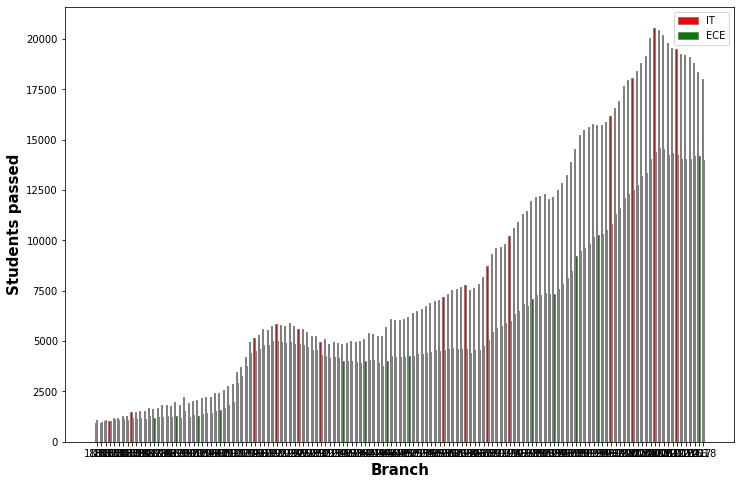

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = list(sex_by_year[sex_by_year.sex == 'F']["count"])
ECE = list(sex_by_year[sex_by_year.sex == 'M']["count"])


# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='ECE')


# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))], list(sex_by_year[sex_by_year.sex == 'M']["year"]))

plt.legend()
plt.show()
